# Introduction to Julia

Julia is a recent programming language that aims at combining high performance with ease of use. It is increasingly popular in the mathematical programming community.

## 0. Preliminaries

In this Jupyter notebook, you have access to a structured equivalent of Julia's REPL, i.e. the interactive console. Here, you can divide your code in cells to modify and run each one separately (use `Shift`+`Enter` to run a cell and move to the next one). By default, the output of a cell is the value of its last expression, you can hide it by ending the cell with `;`.

In [1]:
1 + 2

3

**This tutorial is quite long, especially the first part. If you want, you can skip directly to part 2 or even 3, and come back to the beginning when you don't know how to do something.**

Although we will introduce some useful commands, we cannot describe all of them. A very good summary can be found at https://juliadocs.github.io/Julia-Cheat-Sheet/, and we will often refer the reader to it.

### Differences with Python

For those who already master Python, here are the key novelties of Julia:
- Even though they are not necessary, types are heavily used to make the code both clearer and faster.
- There are no classes, only "structures" which contain data but no methods.
- Expressions automatically continue on the next line if they are not finished. Conversely, multiple expressions can be put on a single line when separated with a semicolon `;`.
- Blocks are not based on indentation but delimited by the `end` keyword.
- Array indexing starts at `a[1]` instead of `a[0]`, and ranges `i:j` include the last index.

A more exhaustive list is available at https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python.

### Compilation

When you run a chunk of code for the first time, it takes longer due to compilation. Don't be surprised, it is fundamental to Julia's performance, and the following runs are much faster.

### Imports

A package can be imported with the keyword `using ...`, which makes all of its functions available without prefix (similar to the Python code `from ... import *`). If you want to keep prefixes, use `import ...` instead.

Before a package can be imported, it must be installed. Here we install all the packages we will need during this tutorial. The following cell may take a while to run, especially with a slow internet connection.

In [2]:
using Pkg
Pkg.add([
        "BenchmarkTools",
        "PyPlot",
])

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


## 1. The basics

### Variables and elementary operations

Variable assignment works as one would expect. Note that you can use LaTeX symbols by typing (for instance) "\beta" + `Tab` in the REPL or a Jupyter cell. This also works for indices when typing "u\_1" + `Tab`.

In [3]:
x = 1
ε = 0.1
u₁ = 10

10

Elementary operations are well summed up in https://juliadocs.github.io/Julia-Cheat-Sheet/. When comparing to Python, the main changes are boolean operators..

### Types

Like in Python, each variable in Julia has a type.

In [4]:
a = 1
b = 1.
c = '1'
d = "1"
typeof(a), typeof(b), typeof(c), typeof(d)

(Int64, Float64, Char, String)

Julia's typing system is dynamic, i.e. variables can change types, but performance can be increased by avoiding such changes and specifying the types when they are known in advance.

The equivalent of Pythons's `None` in Julia is called `nothing`.

### Functions

The first function you need to master is for printing:

In [5]:
println("Hello world!")

Hello world!


More generally, a function is defined with the following syntax:

In [6]:
function addition(a, b)
    println("I am adding stuff")
    return a + b
end

addition (generic function with 1 method)

If we want, we can specify the types of the inputs and output:

In [7]:
function addition(a::Int, b::Int)::Int
    println("I am adding integers")
    return a + b
end

addition (generic function with 2 methods)

Note that there is still only one function `addition`, but it now has two "methods": one for integers, and one more generic.

In [8]:
methods(addition)

# 2 methods for generic function "addition":
[1] addition(a::Int64, b::Int64) in Main at In[7]:1
[2] addition(a, b) in Main at In[6]:1

This is linked to a key feature of Julia called *multiple dispatch*: the program will decide at runtime which function to apply depending on the type of the arguments.

In [9]:
addition(1, 2)

I am adding integers


3

In [10]:
addition(1, 0.5)

I am adding stuff


1.5

### Arrays

Arrays can be created and extended just like in Python, using square brackets:

In [11]:
a = [3, 2]
push!(a, 1)
println(a)

[3, 2, 1]


However, if we know the type and size of the array in advance, it is better to allocate the memory first (with the `undef` object) and then fill it:

In [12]:
a = Array{Int, 1}(undef, 3)
a[1], a[2], a[3] = 3, 2, 1
println(a)

[3, 2, 1]


The syntax `Array{T, d}` denotes an array with element type `T` and `d` dimensions (or axes). For $d=1$ and $d=2$ we have shortcuts:

In [13]:
v = Vector{Float64}(undef, 2)
M = Matrix{Float64}(undef, 3, 2)

3×2 Array{Float64,2}:
 6.94644e-310  6.9464e-310
 6.94643e-310  6.9464e-310
 6.9464e-310   6.9464e-310

These strange numbers are here because without allocation, the matrix still contains whatever was in memory there before.

Vectorizing a function `f` in Julia is done by adding a dot to its name: `f.`.

In [14]:
function square(n::Int)::Int
    return n^2
end

square (generic function with 1 method)

In [15]:
square.(a)

3-element Array{Int64,1}:
 9
 4
 1

The same goes for elementary operators, except the dot comes before:

In [16]:
M = ones(Float64, 3, 3)

3×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [17]:
M^2

3×3 Array{Float64,2}:
 3.0  3.0  3.0
 3.0  3.0  3.0
 3.0  3.0  3.0

In [18]:
M.^2

3×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [19]:
M^2 == M

false

In [20]:
M^2 .== M

3×3 BitArray{2}:
 0  0  0
 0  0  0
 0  0  0

### Conditions and loops

If / then / else block:

In [21]:
function test_sign(n::Int)::String
    if n > 0
        return "strictly positive"
    elseif n < 0
        return "strictly negative"
    else
        return "zero"
    end
end

test_sign (generic function with 1 method)

For loop:

In [22]:
function count_to(n::Int)::Nothing
    for i = 1:n
        println(i)
    end
end

count_to (generic function with 1 method)

This allows us to define arrays by comprehension:

In [23]:
powers = [2^k for k = 0:10]

11-element Array{Int64,1}:
    1
    2
    4
    8
   16
   32
   64
  128
  256
  512
 1024

While loop:

In [24]:
function fibonacci(n::Int)::Int
    a, b = 0, 1
    for k = 1:n
        a, b = b, a + b
    end
    return a
end

fibonacci (generic function with 1 method)

### Structures

Julia's notion of objects boils down to nothing more than a tuple with named components. It is defined as follows:

In [25]:
struct Point3D
    name::String
    x::Float64
    y::Float64
    z::Float64
end

To create an object, just apply its name as a function:

In [26]:
p = Point3D("HOME", 1., 7., -13.)

Point3D("HOME", 1.0, 7.0, -13.0)

The structures themselves contain no methods. However, we can define some by writing functions that take an input with the type we defined:

In [27]:
function display(p::Point3D)
    name, x, y, z = p.name, p.x, p.y, p.z
    println("I am the point $name with coordinates ($x, $y, $z)")
end

display (generic function with 1 method)

In [28]:
display(p)

I am the point HOME with coordinates (1.0, 7.0, -13.0)


### Plots

Plots can be generated with a Julia version of `matplotlib.pyplot`:

In [29]:
using PyPlot
pygui(false)

false

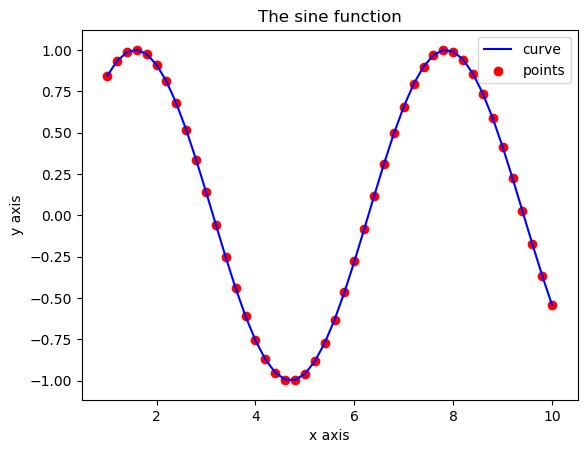

In [30]:
x = collect(1:0.2:10)
y = sin.(x)
plot(x, y, color="blue", label="curve")
scatter(x, y, color="red", label="points")
xlabel("x axis")
ylabel("y axis")
legend()
title("The sine function")
show()

### Miscellaneous

A package can be imported with the keyword `using ...`, which makes all of its functions available without prefix (similar to the Python code `from ... import *`). If you want to keep prefixes, use `import ...` instead.

Exceptions can be thrown using a simple function:

In [31]:
error("You made a serious mistake")

LoadError: You made a serious mistake

The execution time of a function can be measured as follows:

In [32]:
using BenchmarkTools

In [33]:
Δt = @belapsed (M = rand(5, 5); N = M^2)

2.462836185819071e-7

## 2. Linear recurrent sequences

In this problem, we will see different ways to compute the terms of the sequence defined recursively by:

\begin{align}
    x_n & = w_1 x_{n-1} + ... + w_d x_{n-d}
\end{align}

and whose initial values are

\begin{align}
    x_1 = y_1, ~ ..., ~ x_d = y_d
\end{align}

As you have surely noticed, Jupyter notebooks can also accomodate $\LaTeX$ code.

### 2.1 Recursive computation

Implement a function `x_rec(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64` computing $x_n$ recursively.

Do not use it for $n > 30$ or your computer will explode.

In [34]:
function x_rec(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    if n > 30
        @warn "n=$n is too large for recursive computation: returning NaN"
        return NaN
    end
    d = length(w)
    if n <= d
        return y[n]
    else
        return sum(w[k] * x_rec(w, y, n-k) for k = 1:d)
    end
end

x_rec (generic function with 1 method)

In [35]:
@assert x_rec([1., 1.], [1., 1.], 10) ≈ 55.

Implement a function `x_loop` computing $x_n$ using a loop.

In [36]:
function x_loop(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    x = Vector{Float64}(undef, n)
    d = length(w)
    x[1:min(d, n)] .= y[1:min(d, n)]
    for k = d+1:n
        x[k] = sum(w[i] * x[k-i] for i = 1:d)
    end
    return x[n]
end

x_loop (generic function with 1 method)

In [37]:
@assert x_loop([1., 1.], [1., 1.], 10) ≈ 55.

Implement a function `build_M` constructing the matrix
$M = \begin{pmatrix}
0 & 1 & 0 & \cdots & & 0 \\
0 & 0 & 1 & 0 & \cdots & 0 \\
  & & \ddots & \ddots & \ddots & \vdots\\
\vdots & & &  0 & 1 & 0 \\
& & & & 0 & 1 \\
w_1 & w_2 &  & \cdots &  & w_d
\end{pmatrix}$.

In [38]:
function build_M(w::Vector{Float64})::Matrix{Float64}
     d = length(w)
    M = zeros(Float64, d, d)
    for i = 1:d-1
        M[i, i+1] = 1.
    end
    M[end, :] .= w
    return M
end

build_M (generic function with 1 method)

In [39]:
@assert build_M([1., 2., 3.]) ≈ [0. 1. 0. ; 0. 0. 1. ; 1. 2. 3.]

Implement a function `x_pow` computing $x_n$ using the powers of $M$.

In [40]:
function x_pow(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    M = build_M(w)
    return (M^(n-1) * y)[1]
end

x_pow (generic function with 1 method)

In [41]:
@assert x_pow([1., 1.], [1., 1.], 10) ≈ 55.

Implement a function `pow_eigen` computing the powers of a matrix using its eigendecomposition, assuming it exists.

In [42]:
using LinearAlgebra

In [43]:
function pow_eigen(M::Matrix{Float64}, n::Int)::Matrix{Float64}
    factorization = eigen(M)
    λ = factorization.values
    P = factorization.vectors
    return real.(P * Diagonal(λ .^n) * inv(P))
end

pow_eigen (generic function with 1 method)

In [44]:
randM = rand(3, 3)
@assert pow_eigen(randM + randM', 5) ≈ (randM + randM')^5

Implement a function `x_eigen` computing $x_n$ using the eigendecomposition of $M$.

In [45]:
function x_eigen(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    M = build_M(w)
    return (pow_eigen(M, n-1) * y)[1]
end

x_eigen (generic function with 1 method)

In [46]:
@assert x_eigen([1., 1.], [1., 1.], 10) ≈ 55.

Compare the execution times of all your functions for various values of $n$ and $d$. Plot the results and conclude on the fastest approach.

In [47]:
using ProgressMeter

In [48]:
function test_method(method::String, w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    start = time()
    reps = 3
    for reps = 1:reps
        if method == "rec"
            x_rec(w, y, n)
        elseif method == "loop"
            x_loop(w, y, n)
        elseif method == "pow"
            x_pow(w, y, n)
        elseif method == "eigen"
            x_eigen(w, y, n)
        end
    end
    stop = time()
    return (stop - start) / reps
end

test_method (generic function with 1 method)

In [56]:
d = 5
w = rand(d)
y = rand(d)

times_by_method = Dict()
n_values = convert.(Int, round.(10 .^ (1:0.5:7)))

@showprogress for method in ["loop", "pow", "eigen"]
    times_by_method[method] = Float64[]
    for n in n_values
        duration = test_method(method, w, y, n)
        push!(times_by_method[method], duration)
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


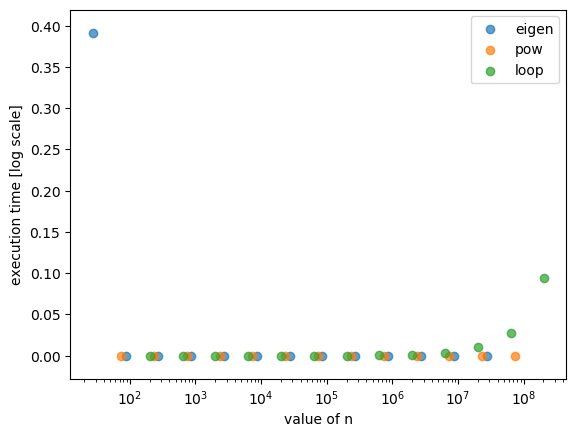

In [50]:
for (i, method) in enumerate(collect(keys(times_by_method)))
    scatter(n_values .* exp(i), times_by_method[method], label=method, alpha=0.7)
end
legend()
xscale("log")
xlabel("value of n")
ylabel("execution time [log scale]")
show()

## 3. Graph algorithms

Implement a weighted digraph data structure where vertices are labelled from $1$ to $n$

In [51]:
struct Graph
    n::Int
    adj::Matrix{Float64}
end

Implement a function `nbvertices` counting the vertices of a graph $G$

In [52]:
function nbvertices(G::Graph)::Int
    return G.n
end

nbvertices (generic function with 1 method)

Implement a function `vertices` listing the vertices of a graph $G$

In [53]:
function vertices(G::Graph)::Vector{Int}
    V = collect(1:G.n)
    return V
end

vertices (generic function with 1 method)

Implement functions `inneighbors` and `outneighbors` listing the neighbors of a vertex $u$ in $G$

In [54]:
function inneighbors(G::Graph, u::Int)::Vector{Int}
    return [v for v in vertices(G) if G.adj[v, u] != 0.]
end

function outneighbors(G::Graph, u::Int)::Vector{Int}
    return [v for v in vertices(G) if G.adj[u, v] != 0.]
end

outneighbors (generic function with 1 method)

Implement a function `edges` listing the edges of a graph $G$ as integer tuples

In [55]:
function edges(G::Graph)::Vector{Tuple{Int, Int}}
    E = Tuple{Int, Int}[]
    for u in vertices(G)
        for v in neighbors(G, u)
            push!(E, (u, v))
        end
    end
    return E
end

edges (generic function with 1 method)

Implement depth-first search and topological sorting

Implement breadth-first search

Implement Dijkstra's algorithm, either in a naive way or using the priority queue of `DataStructures`

Implement the Ford-Bellman algorithm

Implement the Edmunds-Karp algorithm, using edge weights as the capacities

Implement Kruskal's algorithm

Implement a function checking whether a graph is bipartite

Implement the Hungarian algorithm